# Hackathon. Advanced Analytics of Finance. 

# Feature Selection.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data
factors=pd.read_csv("Factors.csv")
rets=pd.read_csv("StockReturns.csv")

factors["date"]=pd.to_datetime(factors["date"], infer_datetime_format=True)
factors["date"] = pd.to_datetime(factors["date"]).dt.date
factors.set_index('date', inplace=True)
rets["date"]=pd.to_datetime(rets["date"], infer_datetime_format=True)
rets["date"] = pd.to_datetime(rets["date"]).dt.date
rets.set_index('date', inplace=True)

In [3]:
#standardizing factors
factors=factors/100
factors=(factors-factors.mean())/factors.std()

rets=rets/100
rets.sub(factors["rf"], axis="index")

,return1,return2,return3,return4,return5,return6,return7,return8,return9,return10,...,return491,return492,return493,return494,return495,return496,return497,return498,return499,return500
date,,,,,,,,,,,,,,,,,,,,,
1970-01-01,-1.293092,-1.106639,-1.198459,-1.202235,-1.248946,-1.306683,-1.278177,-1.224427,-1.191231,-1.290458,...,-1.318177,-1.393649,-1.264606,-1.313453,-1.282779,-1.285210,-1.292315,-1.215815,-1.196226,-1.246748
1970-01-01,-1.622901,-1.670520,-1.624997,-1.622901,-1.638728,-1.656992,-1.641651,-1.556234,-1.654816,-1.657089,...,-1.562461,-1.643309,-1.560754,-1.599091,-1.639995,-1.681411,-1.664918,-1.530044,-1.618553,-1.445123
1970-01-01,-1.960958,-1.855402,-2.089389,-1.883209,-1.960958,-1.927624,-1.972210,-2.016910,-1.883668,-1.892226,...,-1.897573,-1.768249,-1.894646,-1.931500,-1.951092,-1.944800,-1.874993,-1.901481,-1.989529,-1.871021
1970-01-01,-1.910383,-1.725552,-1.807324,-1.815124,-1.896973,-1.786448,-1.926024,-1.849193,-1.801309,-1.910530,...,-1.947826,-1.963988,-1.912080,-1.901944,-1.729605,-1.910283,-1.823458,-1.793866,-1.786599,-1.820482
1970-01-01,-2.486563,-2.485348,-2.454298,-2.537072,-2.482797,-2.403051,-2.563739,-2.559799,-2.470717,-2.418080,...,-2.526763,-2.593676,-2.577888,-2.552576,-2.462692,-2.542981,-2.404996,-2.435948,-2.492128,-2.311265
1970-01-01,-2.130773,-2.155364,-2.254740,-2.092346,-2.187916,-2.330773,-2.184472,-2.284262,-2.130773,-2.183405,...,-2.259345,-2.037773,-2.214816,-2.099277,-2.046158,-2.113532,-2.204107,-2.227712,-2.089913,-2.262352
1970-01-01,-2.031206,-2.046373,-2.046967,-2.014769,-1.954986,-2.045895,-2.036508,-2.217349,-1.925600,-2.024431,...,-2.021163,-2.098505,-2.091682,-2.098307,-1.986369,-1.989591,-1.972072,-1.966992,-2.100819,-1.913319
1970-01-01,-2.252438,-2.063623,-2.210076,-2.175993,-2.190206,-2.294124,-2.172024,-2.200333,-2.297014,-2.176669,...,-2.427580,-2.254834,-2.157692,-2.287072,-2.263528,-2.292876,-2.215568,-2.151156,-2.346965,-2.231187
1970-01-01,-1.826050,-1.566050,-1.660092,-1.842916,-1.894586,-1.737161,-1.675050,-1.778991,-1.801758,-1.873669,...,-1.853322,-1.814123,-1.810177,-1.790477,-1.635665,-1.836576,-1.800733,-1.740848,-1.794232,-1.659383


In [4]:
#defining our training set
X=factors.iloc[:201,1:]
X=np.array(X)
rets=rets.iloc[:201,:]

## Lasso Regression

In [5]:
tscv = TimeSeriesSplit(n_splits=10)
alphas=np.logspace(-4, -0.5, 30)
errors=[range(1,(len(alphas)+1))]
errors=np.array(errors).reshape(-1,1)

#cross validetion of Lasso regression
for r in range(500):
    Y=rets.iloc[:,r:(r+1)]
    Y=np.array(Y)
    avg_error=[]
    for i in alphas:
        error=[]
        for train_index, test_index in tscv.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test =Y[train_index], Y[test_index]
            lasso = Lasso(alpha=i)
            lasso.fit(X_train,y_train)
            error.append(mse(y_test, lasso.predict(X_test)))    
        avg_error.append(np.mean(np.array(error)))
    errors=np.hstack((errors, np.array(avg_error).reshape(-1,1)))

In [6]:
errors=pd.DataFrame(errors)
errors=errors.iloc[:,1:]
mean_error=errors.apply(np.mean, axis=1)
np.argwhere(mean_error==min(mean_error))
lasso_alpha=alphas[np.argwhere(mean_error==min(mean_error))]
print('Best Lasso Lambda: ' + str(lasso_alpha))
mean_error=np.array(mean_error)
min_error=mean_error[np.argwhere(mean_error==min(mean_error))]
print('MSE forBest Lasso Lambda: ' + str(min_error))

Best Lasso Lambda: [[0.00853168]]
MSE forBest Lasso Lambda: [[0.00699213]]


Text(0.5, 1.0, 'MSE va lambda')

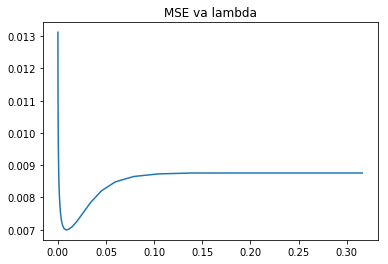

In [7]:
plt.plot(alphas, mean_error)
plt.title("MSE va lambda")

In [8]:
coefs=[range(1,21)]
coefs=np.array(coefs).reshape(-1,1)

for r in range(500):
    Y=rets.iloc[:,r:(r+1)]
    Y=np.array(Y)
    lasso = Lasso(alpha=lasso_alpha)
    lasso.fit(X,Y) 
    coefs=np.hstack((coefs, lasso.coef_.reshape(-1,1)))

In [9]:
coefs=pd.DataFrame(coefs)
av_coefs1=coefs.apply(np.mean, axis=1)
av_coefs1=pd.DataFrame(av_coefs1)
av_coefs1.set_index(factors.columns[1:], inplace=True)
av_coefs1.columns = ['coef']
av_coefs1.sort_values(by='coef', ascending = False)
#table of sorted coefficients

,coef
money,0.043371
other,0.041711
shops,0.038131
hlth,0.037180
utils,0.035616
buseq,0.031409
telcm,0.031150
chems,0.028355
manuf,0.027968
enrgy,0.027276


In [10]:
coefs=pd.DataFrame(coefs)
av_coefs2=coefs.apply(np.median, axis=1)
av_coefs2=pd.DataFrame(av_coefs2)
av_coefs2.set_index(factors.columns[1:], inplace=True)
av_coefs2.columns = ['coef']
av_coefs2.sort_values(by='coef', ascending = False)
#table of sorted coefficients

,coef
mktrf,0.0
smb,0.0
money,0.0
hlth,0.0
shops,0.0
utils,0.0
telcm,0.0
buseq,0.0
chems,0.0
enrgy,0.0


## Ridge Regression 

In [11]:
tscv = TimeSeriesSplit(n_splits=10)
alphas=np.logspace(-4, -0.5, 30)
errors=[range(1,(len(alphas)+1))]
errors=np.array(errors).reshape(-1,1)

#cross validation of ridge regression
for r in range(500):
    Y=rets.iloc[:,r:(r+1)]
    Y=np.array(Y)
    avg_error=[]
    for i in alphas:
        error=[]
        for train_index, test_index in tscv.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test =Y[train_index], Y[test_index]
            ridge = Ridge(alpha=i)
            ridge.fit(X_train,y_train)
            error.append(mse(y_test,ridge.predict(X_test)))    
        avg_error.append(np.mean(np.array(error)))
    errors=np.hstack((errors, np.array(avg_error).reshape(-1,1)))

In [12]:
errors=pd.DataFrame(errors)
errors=errors.iloc[:,1:]
mean_error=errors.apply(np.mean, axis=1)
ridge_alpha=alphas[np.argwhere(mean_error==min(mean_error))]
print(ridge_alpha)
mean_error=np.array(mean_error)
min_error=mean_error[np.argwhere(mean_error==min(mean_error))]
print(min_error)

print('Best Ridge Lambda: ' + str(ridge_alpha))
print('MSE for Best Ridge Lambda: ' + str(min_error))

[[0.31622777]]
[[0.00949104]]
Best Ridge Lambda: [[0.31622777]]
MSE for Best Ridge Lambda: [[0.00949104]]


In [13]:
errors=pd.DataFrame(errors)
errors=errors.iloc[:,1:]
mean_error=errors.apply(np.median, axis=1)
ridge_alpha=alphas[np.argwhere(mean_error==min(mean_error))]
print(ridge_alpha)
mean_error=np.array(mean_error)
min_error=mean_error[np.argwhere(mean_error==min(mean_error))]
print(min_error)

[[0.31622777]]
[[0.00702457]]


Text(0.5, 1.0, 'MSE va lambda')

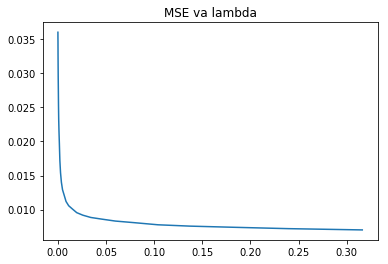

In [14]:
plt.plot(alphas, mean_error)
plt.title("MSE va lambda")

In [15]:
coefs=[range(1,21)]
coefs=np.array(coefs).reshape(-1,1)

for r in range(500):
    Y=rets.iloc[:,r:(r+1)]
    Y=np.array(Y)
    ridge = Ridge(alpha=ridge_alpha)
    ridge.fit(X,Y) 
    coefs=np.hstack((coefs, ridge.coef_.reshape(-1,1)))

In [16]:
coefs=pd.DataFrame(coefs)
av_coefs3=coefs.apply(np.mean, axis=1)
av_coefs3=pd.DataFrame(av_coefs3)
av_coefs3.set_index(factors.columns[1:], inplace=True)
av_coefs3.columns = ['coef']
av_coefs3.sort_values(by='coef', ascending = False)

,coef
money,0.046396
other,0.043147
shops,0.038947
hlth,0.037519
utils,0.036482
manuf,0.033909
buseq,0.032516
telcm,0.032015
enrgy,0.027866
chems,0.026699


In [17]:
coefs=pd.DataFrame(coefs)
av_coefs4=coefs.apply(np.median, axis=1)
av_coefs4=pd.DataFrame(av_coefs4)
av_coefs4.set_index(factors.columns[1:], inplace=True)
av_coefs4.columns = ['coef']
av_coefs4.sort_values(by='coef', ascending = False)

,coef
manuf,7.704480e-03
smb,5.426454e-03
money,3.845061e-03
rmw,3.738325e-03
hml,3.679794e-03
utils,2.392482e-03
other,2.120809e-03
nodur,1.548617e-03
telcm,1.514692e-03
cma,1.473866e-03


In [18]:
dfs=[av_coefs1, av_coefs2, av_coefs3, av_coefs4]
av_coefs=pd.concat(dfs, join='outer', axis=1)
av_coefs.columns=['lasso_mean', 'lasso_median', 'ridge_mean', 'ridge_median']
av_coefs

,lasso_mean,lasso_median,ridge_mean,ridge_median
mktrf,0.002839,0.0,0.001701,-2.422735e-03
smb,0.006614,0.0,0.010959,5.426454e-03
hml,0.006862,0.0,0.009884,3.679794e-03
rmw,0.008100,0.0,0.011843,3.738325e-03
cma,0.009864,0.0,0.011257,1.473866e-03
mom,0.010332,0.0,0.008708,-2.683546e-03
lt_rev,0.014358,0.0,0.013933,-1.428572e-07
st_rev,0.016734,0.0,0.016588,3.227592e-04
nodur,0.020870,0.0,0.020216,1.548617e-03
durbl,0.022244,0.0,0.021007,-3.948929e-04
